In [5]:
%pip install pandas
%pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("dataset_con.csv")



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 15.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: /opt/homebrew/opt/python@3.11/bin/python3.11 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/d6/dycg0kxj0y10q2z8lbd435nm0000gn/T/ipykernel_90136/118592550.py:5: DtypeWarning: Columns (82) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset_con.csv")


## Column Taxonomy
Goal: Understand what kinds of indicators exist in the dataset by grouping
columns that describe the same phenomenon (e.g. cancer, HIV, suicide).
No cleaning or removal is done here.


In [ ]:
cols = [c for c in df.columns if c not in ["geo", "time"]]
print(cols)

['debt_to_foreigners_by_public_and_private_percent_of_gni', 'population_growth_annual_percent_with_projections', 'stomach_cancer_deaths_per_100000_women', 'lung_cancer_number_of_new_male_cases', 'imports_percent_of_gdp', 'under_five_mortality_from_cme_per_1000_born', 'female_population_with_projections', 'malaria_number_of_cases_reported', 'mean_years_in_school_women_of_reproductive_age_15_to_44', 'total_health_spending_per_person_us', 'colonandrectum_cancer_new_cases_per_100000_men', 'electricity_use_per_person', 'maternal_mortality_ratio_per_100000_live_births', 'sex_ratio_0_14_years', 'other_deaths_in_newborn_per_1000_births', 'hiv_deaths_in_children_1_59_months_per_1000_births', 'infectious_tb_treatment_dots_completed_percent', 'liver_cancer_new_cases_per_100000_women', 'market_value_of_listed_companies_percent_of_gdp', 'self_employed_percent_of_employment', 'median_age_years', 'epidemic_deaths_annual_number', 'measles_deaths_in_children_1_59_months_total_deaths', 'females_aged_15p

In [ ]:
cols = [c for c in df.columns if c not in ["geo", "time"]]

from collections import Counter

prefix_counts = Counter([c.split("_")[0] for c in cols])

prefix_counts.most_common(40)

[('mean', 16),
 ('suicide', 15),
 ('all', 14),
 ('total', 11),
 ('females', 11),
 ('males', 11),
 ('aged', 11),
 ('income', 10),
 ('stomach', 8),
 ('lung', 8),
 ('female', 8),
 ('colonandrectum', 8),
 ('liver', 8),
 ('male', 8),
 ('literacy', 8),
 ('infectious', 7),
 ('tb', 7),
 ('malaria', 6),
 ('aid', 6),
 ('at', 6),
 ('oil', 6),
 ('population', 5),
 ('sex', 5),
 ('other', 5),
 ('government', 5),
 ('energy', 5),
 ('alternative', 5),
 ('forest', 5),
 ('data', 5),
 ('maternal', 4),
 ('breast', 4),
 ('children', 4),
 ('traffic', 4),
 ('cervical', 4),
 ('primary', 4),
 ('prostate', 4),
 ('urban', 4),
 ('natural', 4),
 ('pneumonia', 4),
 ('diarrhoeal', 4)]

In [ ]:
cancer_cols = [c for c in cols if "cancer" in c.lower()]
suicide_cols = [c for c in cols if "suicide" in c.lower()]
hiv_cols = [c for c in cols if "hiv" in c.lower()]
tb_cols = [c for c in cols if "tb_" in c.lower() or "tuberculosis" in c.lower()]
malaria_cols = [c for c in cols if "malaria" in c.lower()]
mortality_cols = [c for c in cols if "mortality" in c.lower()]
education_cols = [c for c in cols if "school" in c.lower() or "literacy" in c.lower()]
income_cols = [c for c in cols if "income" in c.lower() or "gdp" in c.lower()]
unemployment_cols = [c for c in cols if "unemployment" in c.lower()]
labour_cols = [c for c in cols if "labour" in c.lower()]

infectious_cols = [c for c in cols if "infectious" in c.lower()]
body_cols = [c for c in cols if "body" in c.lower()]
power_cols = [c for c in cols if "power" in c.lower()]
sex_cols = [c for c in cols if "sex" in c.lower()]
birth_cols = [c for c in cols if "birth" in c.lower()]
death_cols = [c for c in cols if "death" in c.lower()]
literacy_cols = [c for c in cols if "literacy" in c.lower()]


def show_group(name, group):
    print(f"\n{name} ({len(group)} columns)")
    for c in group:
        print("  -", c)


show_group("Cancer-related", cancer_cols)
show_group("Suicide-related", suicide_cols)
show_group("HIV-related", hiv_cols)
show_group("TB-related", tb_cols)
show_group("Malaria-related", malaria_cols)
show_group("Mortality-related", mortality_cols)
show_group("Education-related", education_cols)
show_group("Income-related", income_cols)
show_group("Unemployment-related", unemployment_cols)
show_group("Infectious-related", infectious_cols)
show_group("Body-related", body_cols)
show_group("Power-related", power_cols)
show_group("Sex-related", sex_cols)
show_group("Birth-related", birth_cols)
show_group("Labour-related", labour_cols)
show_group("Death-related", death_cols)
show_group("Literacy-related", literacy_cols)


Cancer-related (44 columns)
  - stomach_cancer_deaths_per_100000_women
  - lung_cancer_number_of_new_male_cases
  - colonandrectum_cancer_new_cases_per_100000_men
  - liver_cancer_new_cases_per_100000_women
  - breast_cancer_deaths_per_100000_women
  - liver_cancer_number_of_male_deaths
  - liver_cancer_deaths_per_100000_women
  - lung_cancer_number_of_new_female_cases
  - cervical_cancer_new_cases_per_100000_women
  - cervical_cancer_deaths_per_100000_women
  - colonandrectum_cancer_number_of_new_male_cases
  - liver_cancer_new_cases_per_100000_men
  - prostate_cancer_deaths_per_100000_men
  - cervical_cancer_number_of_new_female_cases
  - liver_cancer_deaths_per_100000_men
  - liver_cancer_number_of_new_male_cases
  - lung_cancer_deaths_per_100000_women
  - colonandrectum_cancer_deaths_per_100000_men
  - lung_cancer_new_cases_per_100000_women
  - stomach_cancer_new_cases_per_100000_women
  - prostate_cancer_number_of_male_deaths
  - colonandrectum_cancer_number_of_male_deaths
  - br

##Entries per year 


In [ ]:
rows_with_data = (
    df[df["time"].between(1950, 2100)]
    .assign(non_empty=lambda x: x.drop(columns=["geo", "time"]).notna().any(axis=1))
    .groupby("time")["non_empty"]
    .sum()
)

print(rows_with_data.loc[1950:2100])

time
1950.0    252
1951.0    250
1952.0    250
1953.0    250
1954.0    250
         ... 
2096.0    236
2097.0    236
2098.0    236
2099.0    238
2100.0    238
Name: non_empty, Length: 151, dtype: int64


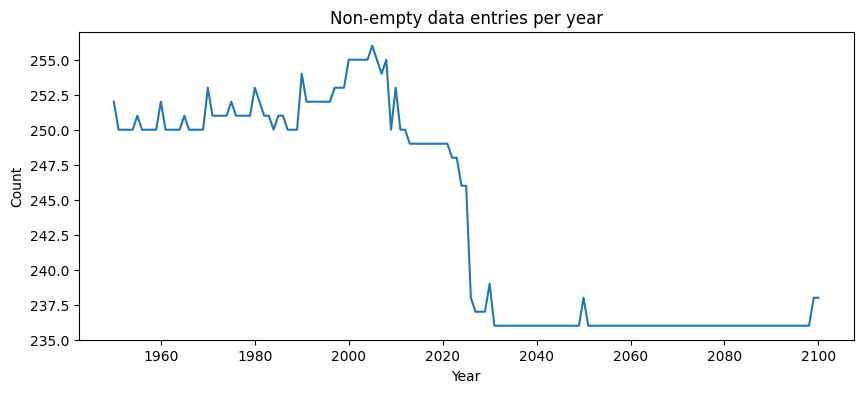

In [8]:
import matplotlib.pyplot as plt

rows_with_data.plot(figsize=(10, 4))
plt.title("Non-empty data entries per year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

##Entries per country 
#Countries


In [ ]:
rows_with_data_country = (
    df.assign(has_data=lambda x: x.drop(columns=["geo", "time"]).notna().any(axis=1))
    .groupby("geo")["has_data"]
    .sum()
    .sort_values(ascending=False)
)

rows_with_data_country.head(300)

geo
abw          151
msr          151
mus          151
mwi          151
mys          151
            ... 
cxr           23
ala           16
cck            9
akr_a_dhe      2
stmar          1
Name: has_data, Length: 258, dtype: int64

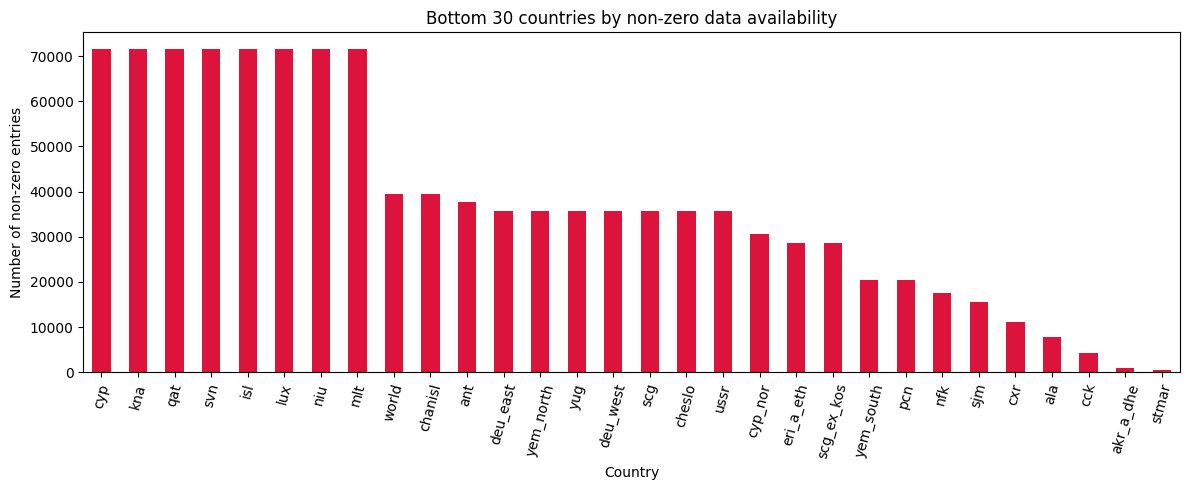

In [ ]:
bottom_n = 30

plt.figure(figsize=(12, 5))
non_zero_per_country.tail(bottom_n).plot(kind="bar", color="crimson")
plt.ylabel("Number of non-zero entries")
plt.xlabel("Country")
plt.title(f"Bottom {bottom_n} countries by non-zero data availability")
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()